<a href="https://colab.research.google.com/github/darshandgithub/darshantableau/blob/main/Car_Data_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Case Study - Australia Car Market Data


![](https://storage.googleapis.com/kaggle-datasets-images/5634382/9304846/1330638fa3dbc5f758e7ce98a10628a2/dataset-cover.png?t=2024-09-03-01-52-08)


Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.




The following steps are covered in this prject:

- Downloading a dataset from an online source
- Data preparation and cleaning with Pandas
- Open-ended exploratory analysis and visualization
- Asking and answering interesting questions
- Summarizing inferences and drawing conclusions

## Introduction

The Australia Car Market dataset from Kaggle provides detailed information on car listings, including attributes such as car models, production year, prices, mileage, engine type, and car brand. This dataset is useful for analyzing car market trends in Australia, price comparison across brands, the effect of mileage or production year on prices, and other features that may influence market values. The dataset can support various analyses such as car price forecasting, feature correlation, and brand popularity comparisons.. You can find the official analysis of the data here: https://www.kaggle.com/datasets/lainguyn123/australia-car-market-data

There are several options for getting a dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the `opendatasets` library to download datasets from Kaggle datasets and Google Drive URLs


We'll use the `opendatasets` helper library to download files from the above URL.

In [ ]:
!pip install opendatasets

In [ ]:
url='https://www.kaggle.com/datasets/lainguyn123/australia-car-market-data'

In [ ]:
url

'https://www.kaggle.com/datasets/lainguyn123/australia-car-market-data'

In [ ]:
import opendatasets as od

In [ ]:
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Darshan D
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lainguyn123/australia-car-market-data


100%|██████████| 601k/601k [00:00<00:00, 44.3MB/s]

 Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
car = pd.read_csv('/content/australia-car-market-data/cars_info.csv')

In [ ]:
car

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,12852453,2003 Holden Commodore Executive VY,4499,Holden,Commodore,Executive,VY,2003,230441,Sedan,Automatic,Unleaded Petrol,Used,3791,Gold,5
17044,12852460,2008 Toyota Yaris YR NCP90R,4999,Toyota,Yaris,YR,NCP90R,2008,237113,Hatchback,Manual,Unleaded Petrol,Used,1299,Yellow,5
17045,12852462,2002 Holden Jackaroo SE LWB (4X4) U8,7999,Holden,Jackaroo,SE LWB (4X4),U8,2002,238768,Wagon,Automatic,Diesel,Used,2999,Gold,7
17046,12852463,2016 Hyundai I30 Active GD4 Series 2,14000,Hyundai,I30,Active,GD4 Series 2,2016,49800,Hatchback,Manual,Unleaded Petrol,Used,1797,Blue,5


In [ ]:
car.columns

Index(['ID', 'Name', 'Price', 'Brand', 'Model', 'Variant', 'Series', 'Year',
       'Kilometers', 'Type', 'Gearbox', 'Fuel', 'Status', 'CC', 'Color',
       'Seating Capacity'],
      dtype='object')

This data set has 16 columns and each column has some separate values

## Data Preprocessing & Cleaning with Pandas

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [ ]:
car.isnull().sum()

,0
ID,0
Name,0
Price,0
Brand,0
Model,0
Variant,0
Series,0
Year,0
Kilometers,0
Type,0


This dataset does not have a single null value that's why i moved to next step

**Removing Duplicates**

In [ ]:
car.drop_duplicates()


,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,12852453,2003 Holden Commodore Executive VY,4499,Holden,Commodore,Executive,VY,2003,230441,Sedan,Automatic,Unleaded Petrol,Used,3791,Gold,5
17044,12852460,2008 Toyota Yaris YR NCP90R,4999,Toyota,Yaris,YR,NCP90R,2008,237113,Hatchback,Manual,Unleaded Petrol,Used,1299,Yellow,5
17045,12852462,2002 Holden Jackaroo SE LWB (4X4) U8,7999,Holden,Jackaroo,SE LWB (4X4),U8,2002,238768,Wagon,Automatic,Diesel,Used,2999,Gold,7
17046,12852463,2016 Hyundai I30 Active GD4 Series 2,14000,Hyundai,I30,Active,GD4 Series 2,2016,49800,Hatchback,Manual,Unleaded Petrol,Used,1797,Blue,5


Removing duplicates in a dataset refers to eliminating rows that contain identical values across all columns or a specified subset of columns. This is done to avoid redundancy and ensure that the analysis is not skewed by repeated data points.Since there is no duplicate rows are found in this data set so we can move to next process

In [ ]:
car.Price.max()

999000

In [ ]:
car.Price.min()

1000

In [ ]:
car.describe()

,ID,Price,Year,Kilometers,CC,Seating Capacity
count,1.704800e+04,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,1.279027e+07,36777.778038,2015.481288,1.032314e+05,2491.830303,5.115849
std,5.051111e+04,30305.015328,4.721591,8.041313e+04,881.985562,1.121791
min,1.153013e+07,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,1.275715e+07,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,1.280207e+07,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,1.283131e+07,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,1.285246e+07,999000.000000,2022.000000,2.700000e+06,7300.000000,14.000000


In [ ]:
car[car.Price==1000]

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
7849,12796115,2000 Holden Astra CD TS,1000,Holden,Astra,CD,TS,2000,243252,Hatchback,Manual,Unleaded Petrol,Used,1796,Blue,5


## **Exploratory Analysis and Visualization**

**Exploratory Analysis and Visualization** refers to the process of examining data sets to summarize their main characteristics, often using visual methods like graphs, charts, and plots. The goal is to explore and understand the data, identify patterns, detect anomalies, and generate insights without making formal statistical inferences.

Key components include:
1. **Exploratory Data Analysis (EDA):** It involves techniques like summary statistics, distributions, correlations, and outlier detection to understand the data structure.
2. **Visualization:** Graphical representations such as histograms, bar charts, scatter plots, and heat maps are used to make the data easier to interpret and communicate insights effectively.


Lets import the other libraries which is helpfull for the getting visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Price

In [ ]:
car.Price.describe()

,Price
count,17048.000000
mean,36777.778038
std,30305.015328
min,1000.000000
25%,18800.000000
50%,29990.000000
75%,45990.000000
max,999000.000000


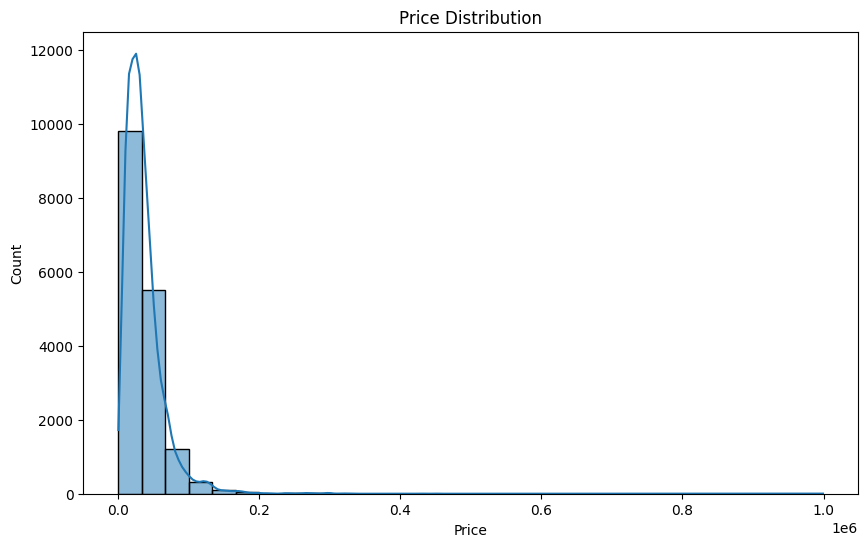

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(car['Price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

The code creates a visualization of price data using a histogram and KDE (Kernel Density Estimate) curve. The histogram displays the frequency of different price values, showing how often each price occurs, while the KDE curve provides a smooth estimate of the overall price distribution.
This helps to identify the central tendency, spread, and potential outliers in the prices. You can observe whether the price distribution is normal, skewed, or multimodal, offering insights into patterns or trends in the price data.








# Brand Column

In [ ]:
car.Brand.value_counts()

,count
Brand,
Toyota,2768
Holden,1505
Ford,1490
Mazda,1167
Hyundai,1087
Mitsubishi,1074
Volkswagen,1019
Nissan,1008
Kia,744


In [ ]:
car.Brand.nunique()

59

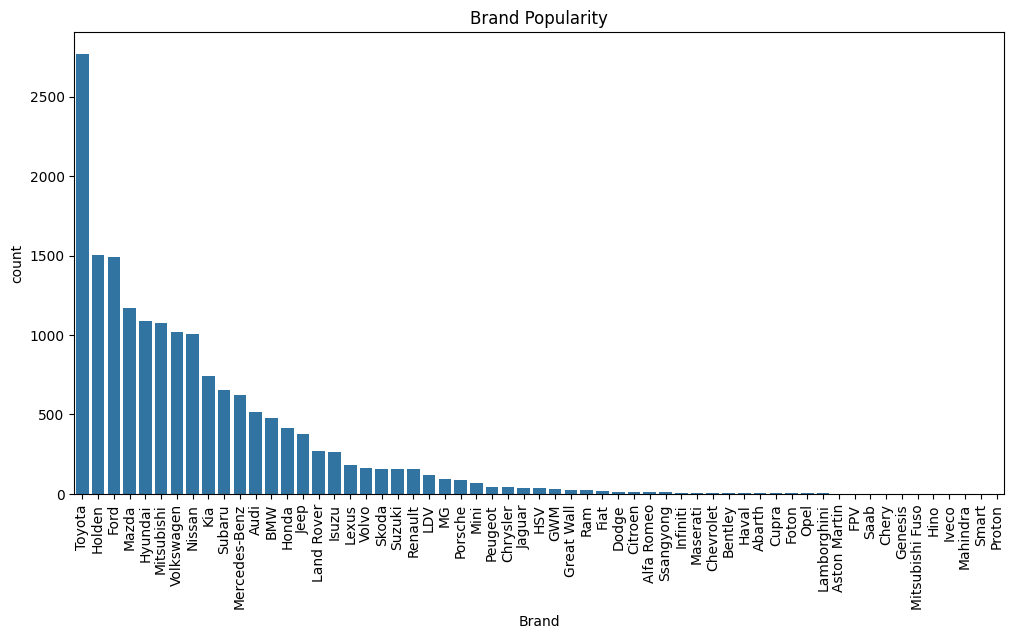

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=car, x='Brand', order=car['Brand'].value_counts().index)
plt.title('Brand Popularity')
plt.xticks(rotation=90)
plt.show()

By seeing the plot we can say that out of 59 car brands the toyota brands cars are present in more number and in the second spot holden is there and in the third position Ford is there

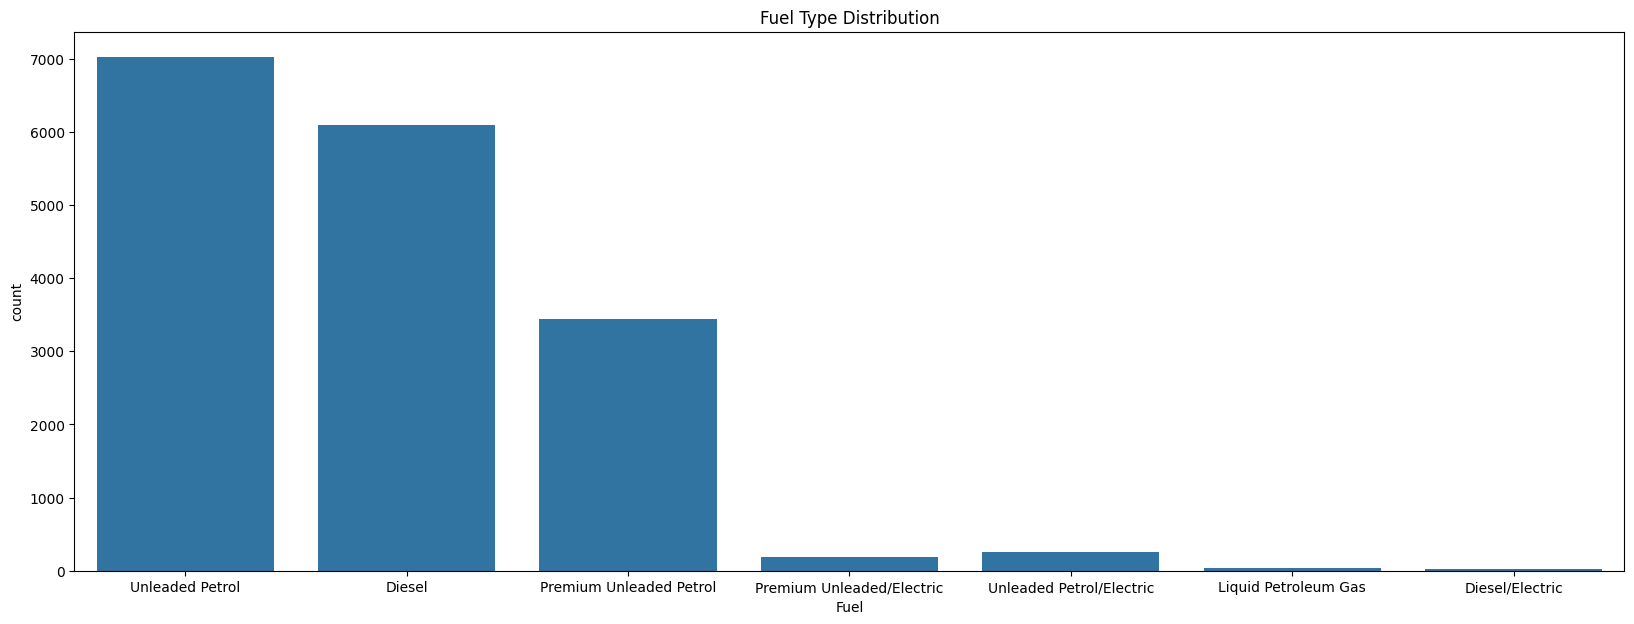

In [ ]:
plt.figure(figsize=(20, 7))
sns.countplot(data=car, x='Fuel')
plt.title('Fuel Type Distribution')
plt.show()

#Year Column

In [ ]:
car.Year.describe()

,Year
count,17048.000000
mean,2015.481288
std,4.721591
min,1989.000000
25%,2013.000000
50%,2016.000000
75%,2019.000000
max,2022.000000


In [ ]:
car.Year.nunique()

34

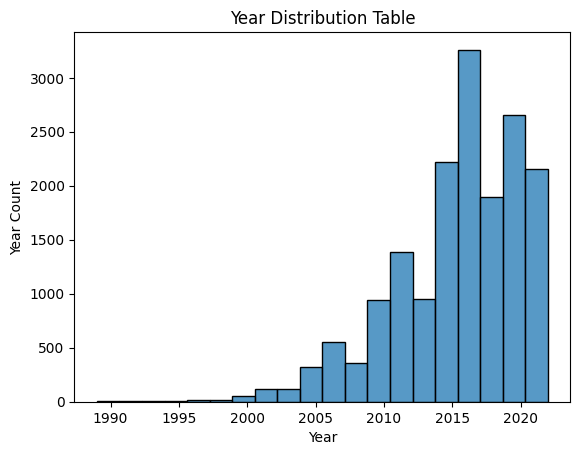

In [ ]:
sns.histplot(x=car['Year'],bins=20)
plt.title("Year Distribution Table")
plt.xlabel("Year")
plt.ylabel('Year Count')
plt.show()

 Australian car market data, where most cars are manufactured in 2015, and the average manufacturing year ranges between 2015 to 2019

 Since the most common cars in the Australian market were made between 2015 and 2019, the used car market is filled with relatively new vehicles.
Consumers looking for second-hand vehicles may find that cars from these years are in good condition, offer newer features, and are more fuel-efficient than older models.
The resale value of cars from this range could be higher due to their relatively new age and updated features.

# Kilometers Column

In [ ]:
car.Kilometers.describe()

,Kilometers
count,1.704800e+04
mean,1.032314e+05
std,8.041313e+04
min,1.000000e+00
25%,4.450225e+04
50%,8.845400e+04
75%,1.488735e+05
max,2.700000e+06


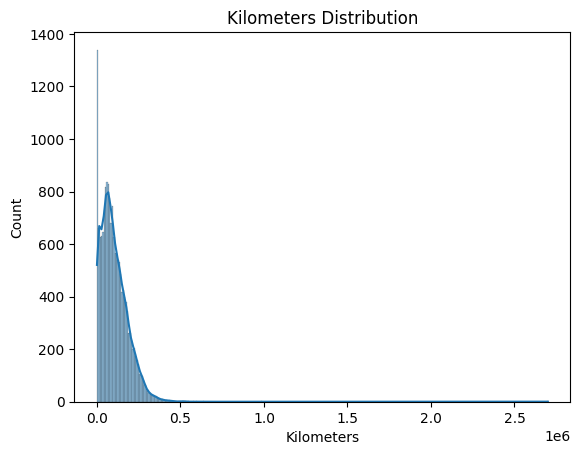

In [ ]:
sns.histplot(x=car['Kilometers'],kde=True)
plt.title("Kilometers Distribution")
plt.xlabel("Kilometers")
plt.ylabel('Count')
plt.show()

This data provides a statistical summary of the kilometers driven (likely referring to the odometer reading) for cars in the Australian car market dataset.

The average number of kilometers driven by the cars in the dataset is 103,231 km.
The car with the lowest kilometers driven has just 1 km recorded. This likely represents a brand-new vehicle or a car that has been driven very minimally (perhaps just out of the dealership or during testing).
The car with the highest kilometers driven has 2.7 million km on the odometer, an extreme outlier.

# Type Column

In [ ]:
car.Type.value_counts()

,count
Type,
Wagon,7768
Hatchback,2424
Sedan,2325
Dual Cab Utility,657
Coupe,471
Double Cab Pick Up,425
Cab Chassis,424
Dual Cab Pick-up,423
Van,384


In [ ]:
car.Type.nunique()

56

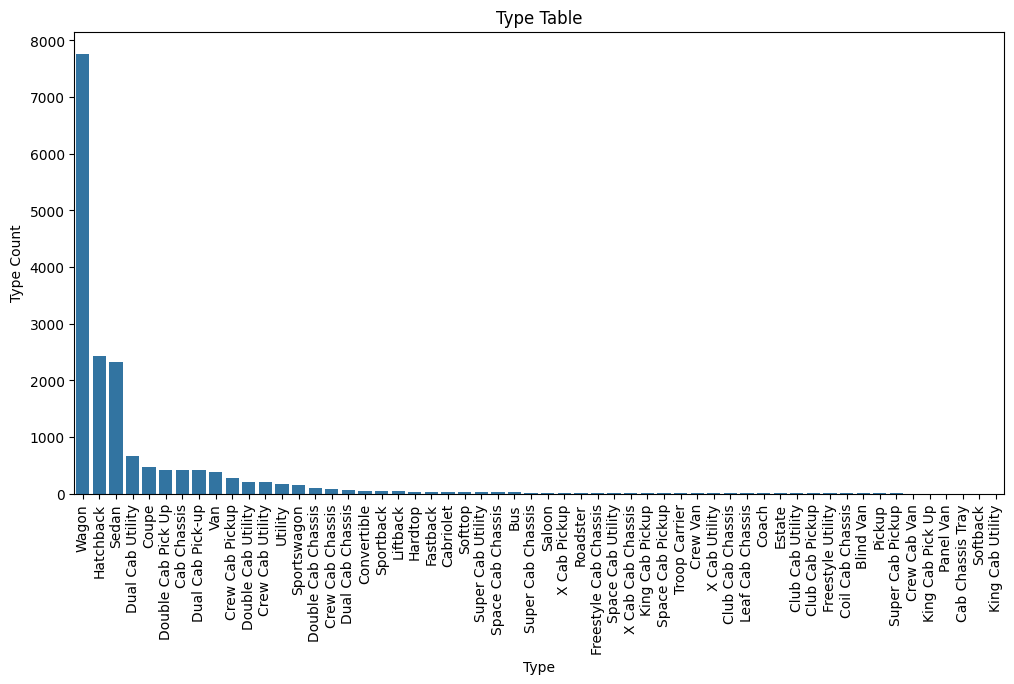

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=car, x='Type', order=car['Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Type Table")
plt.xlabel("Type")
plt.ylabel('Type Count')
plt.show()

The dataset is dominated by Wagons, Hatchbacks, and Sedans, reflecting the preference for these body styles in the Australian market.
The variety of vehicle types shows a diverse market catering to different needs, from family cars to commercial and niche luxury vehicles.
The presence of many variations in utility and pickup vehicles highlights their significant role, likely driven by Australia’s rural and industrial needs.
This distribution gives insights into consumer preferences, market demand for specific body styles, and possibly regional or usage-based trends.

# Gearbox Column

In [ ]:
car.Gearbox.value_counts()

,count
Gearbox,
Automatic,14578
Manual,2446
AWD,13
Front,8
Rear,3


<ipython-input-36-283a9f2a352d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Automatic','Manual','AWD','Front','Rear'],y=car.Gearbox.value_counts(),palette='viridis')


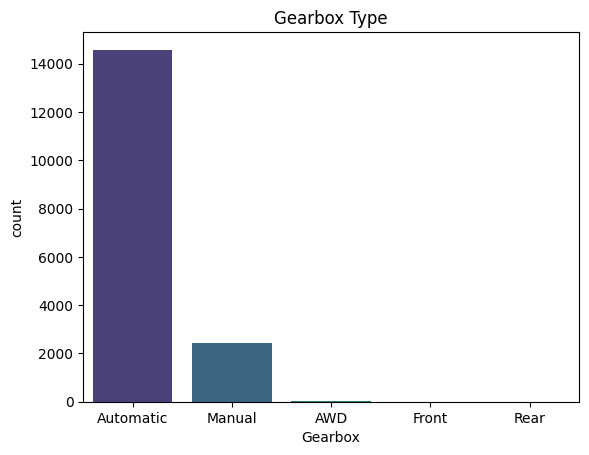

In [ ]:
sns.barplot(x=['Automatic','Manual','AWD','Front','Rear'],y=car.Gearbox.value_counts(),palette='viridis')
plt.title("Gearbox Type")
plt.xlabel("Gearbox")
plt.show()

By observing the plot in australia automatic gearbox car preffered more
Popularity of Automatic Cars: The high number of automatic cars indicates a trend towards convenience and ease of driving in the Australian market.
Low Manual Car Numbers: The manual gear box type, while still present, is significantly lower, which may reflect a shift away from manual driving preferences.
AWD, Front, and Rear Drive: These types could represent specialized vehicles with specific driving dynamics, like sports cars or off-road vehicles, and their low numbers might reflect niche markets.

# Fuel Column

In [ ]:
count=car.Fuel.value_counts()
count

,count
Fuel,
Unleaded Petrol,7016
Diesel,6087
Premium Unleaded Petrol,3438
Unleaded Petrol/Electric,255
Premium Unleaded/Electric,194
Liquid Petroleum Gas,40
Diesel/Electric,18


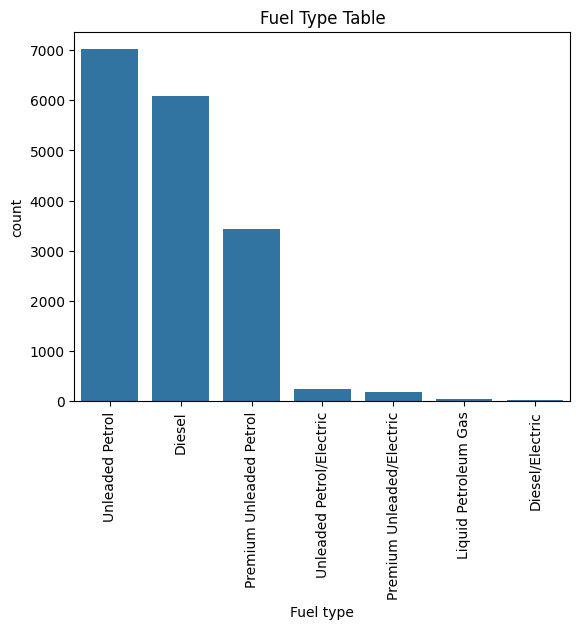

In [ ]:
sns.barplot(x=['Unleaded Petrol','Diesel','Premium Unleaded Petrol','Unleaded Petrol/Electric','Premium Unleaded/Electric','Liquid Petroleum Gas','Diesel/Electric'],y=count)
plt.xticks(rotation=90)
plt.title('Fuel Type Table')
plt.xlabel('Fuel type')
plt.show()

 the "Fuel" column appears to represent the type of fuel used by different vehicles in the Australian car market. Each row corresponds to the number of vehicles that use a specific type of fuel. Here's a description of the fuel types:

Unleaded Petrol (7016 vehicles)
This is the most common type of fuel, used by a large number of vehicles. Unleaded petrol is widely available and generally cheaper than premium alternatives.

Diesel (6087 vehicles)
Diesel fuel is used by many vehicles, often preferred for its fuel efficiency and suitability for heavy-duty vehicles, such as trucks and SUVs.

Premium Unleaded Petrol (3438 vehicles)
Premium unleaded petrol has a higher octane rating than regular unleaded petrol, making it suitable for high-performance engines.

Unleaded Petrol/Electric (255 vehicles)
These vehicles are hybrids that use both unleaded petrol and electric power, offering better fuel efficiency and lower emissions compared to traditional petrol engines.

Premium Unleaded/Electric (194 vehicles)
Similar to the unleaded petrol/electric hybrids, these vehicles combine premium unleaded petrol with electric power, likely offering enhanced performance along with efficiency.

Liquid Petroleum Gas (LPG) (40 vehicles)
LPG is a less common fuel type in cars, but it is an alternative to petrol and diesel. Vehicles running on LPG produce lower emissions.

Diesel/Electric (18 vehicles)
These are hybrid vehicles that use both diesel and electric power, typically focusing on improving fuel efficiency, particularly in heavy-duty or long-distance driving contexts.

This variety in fuel types suggests a diverse car market, including traditional fuel types, hybrid options, and alternative fuels such as LPG.

# Color Column

In [ ]:
count=car.Color.value_counts()
count

,count
Color,
White,6177
Silver,2452
Grey,2441
Black,1970
Blue,1577
...,...
Hornet,1
selenite,1
Daytona,1


Most car colours are white followed by silver

# Seating Capacity

In [ ]:
count=car['Seating Capacity'].value_counts()
count

,count
Seating Capacity,
5,12826
7,2177
2,744
4,653
3,305
8,297
6,20
14,19
9,4


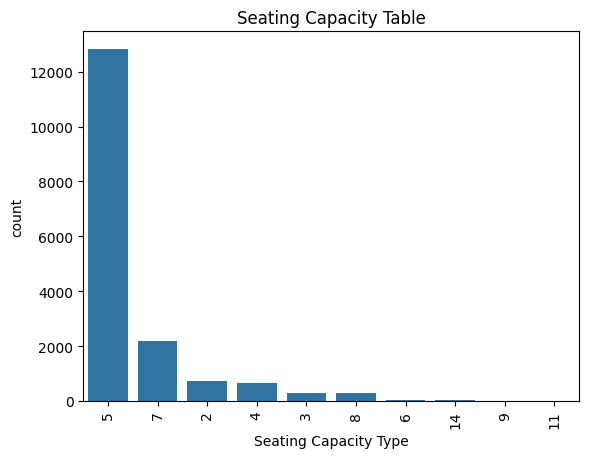

In [ ]:
sns.barplot(x=['5','7','2','4','3','8','6','14','9','11'],y=count)
plt.xticks(rotation=90)
plt.title('Seating Capacity Table')
plt.xlabel('Seating Capacity Type')
plt.show()

By seeing the plot we can say 5 seater cars are more then 7 seaters cars are at the second place

# MultiVariate Analysis

**Price vs Year**

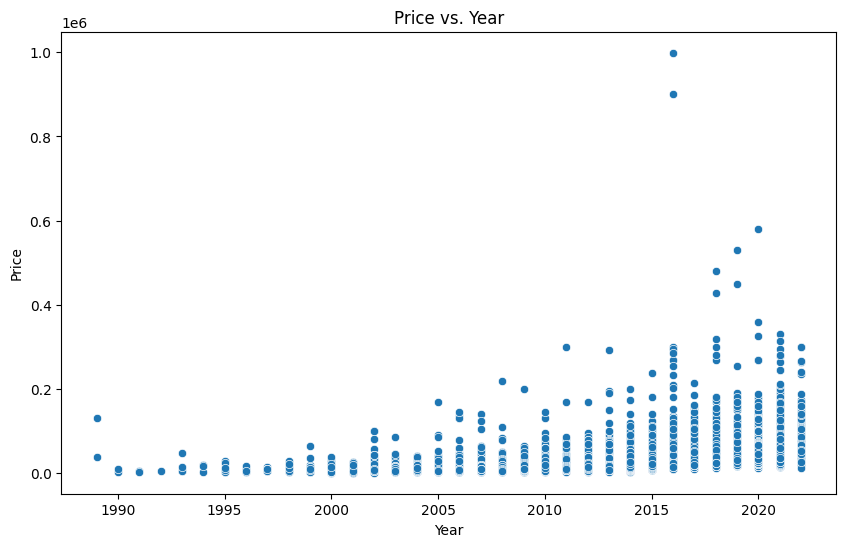

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car, x='Year', y='Price')
plt.title('Price vs. Year')
plt.show()

**Price vs Kilometer**

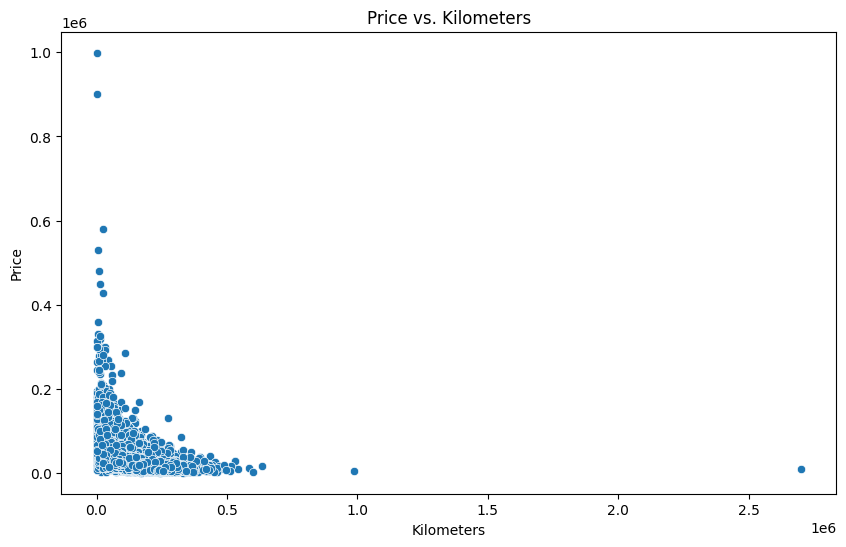

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car, x='Kilometers', y='Price')
plt.title('Price vs. Kilometers')
plt.show()

**Price vs Brand**

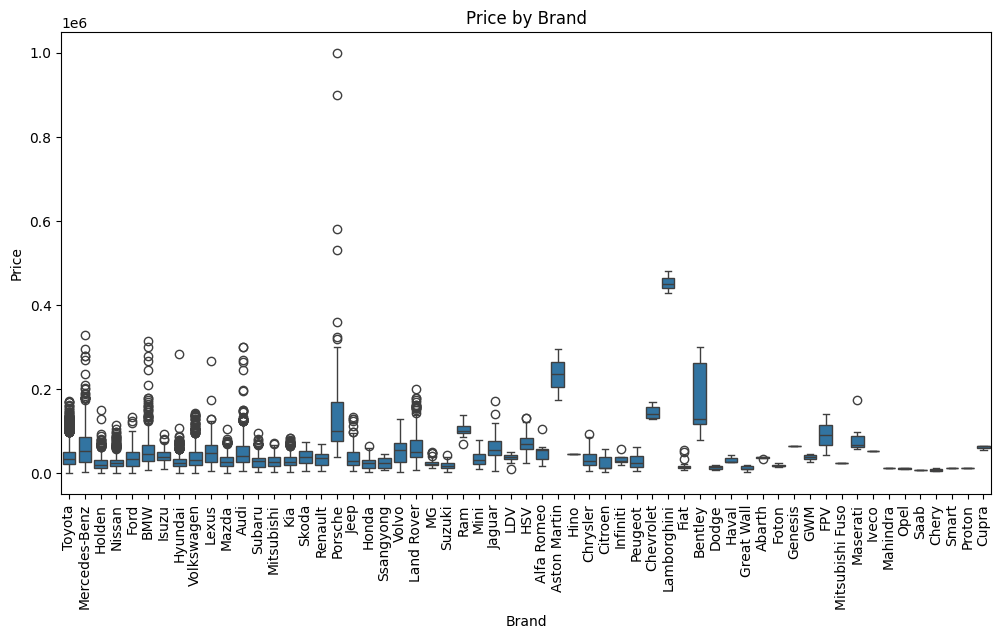

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=car, x='Brand', y='Price')
plt.title('Price by Brand')
plt.xticks(rotation=90)
plt.show()

**CC vs Price**

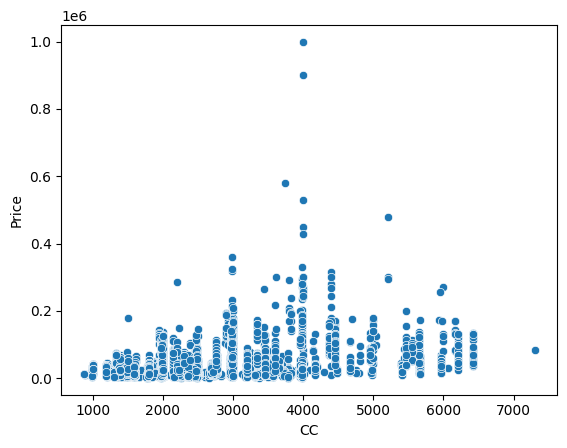

In [ ]:
sns.scatterplot(car, x='CC', y='Price')
plt.show()

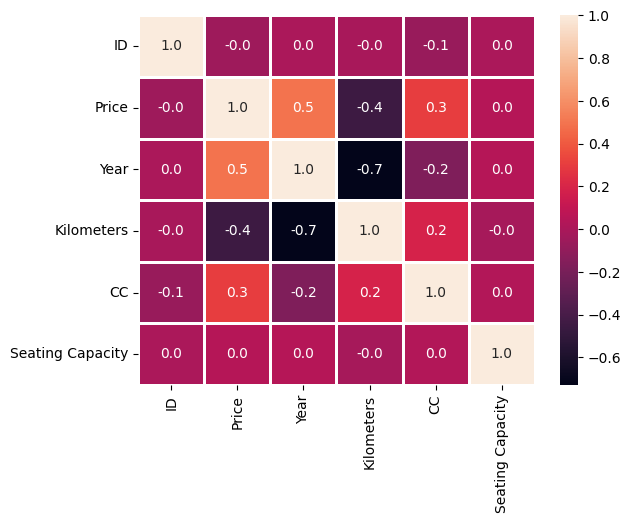

In [ ]:
sns.heatmap(car.corr(numeric_only=True), annot=True, fmt='.1f', linewidths=1)
plt.show()